# 🔥 극단적 분석: J리그2 vs K리그2 경기 흥미도 비교

## 📌 분석 목표
**J리그2가 K리그2보다 경기가 훨씬 더 흥미진진하다는 것을 데이터로 극단적으로 증명**

## 🎯 흥미도 측정 지표

### 1. 득점력 (공격성)
- 경기당 평균 총 득점
- 다득점 경기 비율 (3골+, 5골+, 7골+)
- 무득점 경기 비율 (낮을수록 좋음)

### 2. 박빙 승부 (치열함)
- 1골 차 승부 비율
- 무승부 비율
- 박빙 경기 비율 (무승부 + 1골차)

### 3. 공격 강도
- 경기당 평균 슈팅 수
- 경기당 평균 유효슈팅 수
- 경기당 평균 코너킥 수

### 4. 경기 치열도
- 경기당 평균 파울 수
- 경기당 평균 경고 수
- 경기당 평균 퇴장 수

### 5. 극적 요소
- 대승 경기 비율 (3골차 이상)
- 골 잔치 경기 비율 (양팀 합산 5골 이상)

---

**분석 기간**: 2023~2025 (3시즌)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['figure.dpi'] = 100

## 1. 데이터 로드

In [2]:
# J리그2 데이터
j_df = pd.read_csv('../data/jleague2_matche_2023-2025.csv', encoding='utf-8-sig')
j_df['date'] = pd.to_datetime(j_df['date'])
j_df['total_goals'] = j_df['home_score'] + j_df['away_score']
j_df['goal_diff'] = abs(j_df['home_score'] - j_df['away_score'])
j_df['total_shots'] = j_df['home_shoot_total'] + j_df['away_shoot_total']
j_df['total_shots_on_target'] = j_df['home_shoot_ontarget'] + j_df['away_shoot_ontarget']
j_df['total_corners'] = j_df['home_corner'] + j_df['away_corner']
j_df['total_fouls'] = j_df['home_foul'] + j_df['away_foul']
j_df['total_yellows'] = j_df['home_yellow'] + j_df['away_yellow']
j_df['total_reds'] = j_df['home_red'] + j_df['away_red']

print(f"J리그2 경기 수: {len(j_df)}")
print(f"기간: {j_df['date'].min()} ~ {j_df['date'].max()}")
j_df.head(3)

J리그2 경기 수: 1219
기간: 2023-02-18 13:05:00 ~ 2025-11-29 14:00:00


,season,game_id,date,day,stadium,home_team,home_score,away_team,away_score,home_shoot_total,...,home_red,away_red,total_goals,goal_diff,total_shots,total_shots_on_target,total_corners,total_fouls,total_yellows,total_reds
0,2023,360094,2023-02-18 13:05:00,토,야마나시 추오 뱅크,반포레고후,1,야마가타,2,11,...,0,0,3,1,24,10,11,18,2,0
1,2023,360095,2023-02-18 14:00:00,토,J 빌리지 스타디움,이와키FC,2,후지에다,3,12,...,0,0,5,1,28,12,7,22,3,0
2,2023,360096,2023-02-18 14:00:00,토,야마하,주빌로이와타,2,오카야마,3,12,...,0,0,5,1,24,9,14,19,3,0


In [3]:
# K리그2 데이터
k_all = pd.read_csv('../data/kleague_match_final_2015-2025.csv', encoding='utf-8-sig')
k_df = k_all[(k_all['LEAGUE_NAME'] == 'K리그2') & (k_all['Meet_Year'].isin([2023, 2024, 2025]))].copy()
k_df['Game_Datetime'] = pd.to_datetime(k_df['Game_Datetime'])
k_df['total_goals'] = k_df['HomePoints'] + k_df['AwayPoints']
k_df['goal_diff'] = abs(k_df['HomePoints'] - k_df['AwayPoints'])
k_df['total_shots'] = k_df['home_attempts'] + k_df['away_attempts']
k_df['total_shots_on_target'] = k_df['home_on_target'] + k_df['away_on_target']
k_df['total_corners'] = k_df['home_corners'] + k_df['away_corners']
k_df['total_fouls'] = k_df['home_fouls'] + k_df['away_fouls']
k_df['total_yellows'] = k_df['home_yellow_cards'] + k_df['away_yellow_cards']
k_df['total_reds'] = k_df['home_red_cards'] + k_df['away_red_cards']

print(f"K리그2 경기 수: {len(k_df)}")
print(f"기간: {k_df['Game_Datetime'].min()} ~ {k_df['Game_Datetime'].max()}")
k_df.head(3)

K리그2 경기 수: 747
기간: 2023-03-01 13:30:00 ~ 2025-11-30 14:00:00


,Meet_Year,LEAGUE_NAME,Round,Game_id,Game_Datetime,Day,HomeTeam,AwayTeam,HomeRank,AwayRank,...,away_second_30_possession,away_second_45_possession,total_goals,goal_diff,total_shots,total_shots_on_target,total_corners,total_fouls,total_yellows,total_reds
3973,2023,K리그2,1,1,2023-03-01 13:30:00,수,경남,부천,0,0,...,52.33,52.12,0,0,32.0,8.0,15.0,25.0,1.0,0.0
3974,2023,K리그2,1,2,2023-03-01 13:30:00,수,천안,부산,0,0,...,45.04,43.96,0,0,22.0,9.0,9.0,32.0,6.0,0.0
3975,2023,K리그2,1,3,2023-03-01 13:30:00,수,전남,안양,0,0,...,53.53,50.11,0,0,26.0,9.0,12.0,18.0,1.0,0.0


## 2. 득점력 분석 (공격성)

In [4]:
# 득점 관련 지표 계산
scoring_comparison = pd.DataFrame({
    '지표': [
        '경기당 평균 총 득점',
        '3골 이상 경기 비율 (%)',
        '5골 이상 경기 비율 (%)',
        '7골 이상 경기 비율 (%)',
        '무득점 경기 비율 (%)'
    ],
    'J리그2': [
        j_df['total_goals'].mean(),
        (j_df['total_goals'] >= 3).sum() / len(j_df) * 100,
        (j_df['total_goals'] >= 5).sum() / len(j_df) * 100,
        (j_df['total_goals'] >= 7).sum() / len(j_df) * 100,
        (j_df['total_goals'] == 0).sum() / len(j_df) * 100
    ],
    'K리그2': [
        k_df['total_goals'].mean(),
        (k_df['total_goals'] >= 3).sum() / len(k_df) * 100,
        (k_df['total_goals'] >= 5).sum() / len(k_df) * 100,
        (k_df['total_goals'] >= 7).sum() / len(k_df) * 100,
        (k_df['total_goals'] == 0).sum() / len(k_df) * 100
    ]
})

scoring_comparison['격차'] = scoring_comparison['J리그2'] - scoring_comparison['K리그2']
scoring_comparison['우위'] = scoring_comparison['격차'].apply(lambda x: 'J리그2 ✓' if x > 0 else 'K리그2')

print("\n" + "="*100)
print("📊 득점력 비교 (공격성)")
print("="*100)
print(scoring_comparison.to_string(index=False))
print("="*100)


📊 득점력 비교 (공격성)
             지표      J리그2      K리그2         격차     우위
    경기당 평균 총 득점  2.503692 49.812584 -47.308892   K리그2
3골 이상 경기 비율 (%) 46.759639 95.983936 -49.224297   K리그2
5골 이상 경기 비율 (%) 12.387203 93.574297 -81.187095   K리그2
7골 이상 경기 비율 (%)  1.394586 91.834003 -90.439417   K리그2
  무득점 경기 비율 (%)  9.433962  3.346720   6.087242 J리그2 ✓


## 3. 박빙 승부 분석 (치열함)

In [5]:
# 박빙 승부 지표 계산
close_game_comparison = pd.DataFrame({
    '지표': [
        '무승부 비율 (%)',
        '1골 차 승부 비율 (%)',
        '박빙 경기 비율 (무+1골차) (%)',
        '2골 차 이하 비율 (%)'
    ],
    'J리그2': [
        (j_df['goal_diff'] == 0).sum() / len(j_df) * 100,
        (j_df['goal_diff'] == 1).sum() / len(j_df) * 100,
        (j_df['goal_diff'] <= 1).sum() / len(j_df) * 100,
        (j_df['goal_diff'] <= 2).sum() / len(j_df) * 100
    ],
    'K리그2': [
        (k_df['goal_diff'] == 0).sum() / len(k_df) * 100,
        (k_df['goal_diff'] == 1).sum() / len(k_df) * 100,
        (k_df['goal_diff'] <= 1).sum() / len(k_df) * 100,
        (k_df['goal_diff'] <= 2).sum() / len(k_df) * 100
    ]
})

close_game_comparison['격차'] = close_game_comparison['J리그2'] - close_game_comparison['K리그2']
close_game_comparison['우위'] = close_game_comparison['격차'].apply(lambda x: 'J리그2 ✓' if x > 0 else 'K리그2')

print("\n" + "="*100)
print("⚔️ 박빙 승부 비교 (치열함)")
print("="*100)
print(close_game_comparison.to_string(index=False))
print("="*100)


⚔️ 박빙 승부 비교 (치열함)
                  지표      J리그2      K리그2        격차     우위
          무승부 비율 (%) 26.743232  8.701473 18.041760 J리그2 ✓
      1골 차 승부 비율 (%) 44.052502  9.103079 34.949423 J리그2 ✓
박빙 경기 비율 (무+1골차) (%) 70.795734 17.804552 52.991183 J리그2 ✓
      2골 차 이하 비율 (%) 88.187039 26.773762 61.413277 J리그2 ✓


## 4. 공격 강도 분석

In [6]:
# 공격 강도 지표 계산
attack_comparison = pd.DataFrame({
    '지표': [
        '경기당 평균 슈팅',
        '경기당 평균 유효슈팅',
        '경기당 평균 코너킥',
        '20슈팅 이상 경기 비율 (%)',
        '25슈팅 이상 경기 비율 (%)',
        '10코너킥 이상 경기 비율 (%)'
    ],
    'J리그2': [
        j_df['total_shots'].mean(),
        j_df['total_shots_on_target'].mean(),
        j_df['total_corners'].mean(),
        (j_df['total_shots'] >= 20).sum() / len(j_df) * 100,
        (j_df['total_shots'] >= 25).sum() / len(j_df) * 100,
        (j_df['total_corners'] >= 10).sum() / len(j_df) * 100
    ],
    'K리그2': [
        k_df['total_shots'].mean(),
        k_df['total_shots_on_target'].mean(),
        k_df['total_corners'].mean(),
        (k_df['total_shots'] >= 20).sum() / len(k_df) * 100,
        (k_df['total_shots'] >= 25).sum() / len(k_df) * 100,
        (k_df['total_corners'] >= 10).sum() / len(k_df) * 100
    ]
})

attack_comparison['격차'] = attack_comparison['J리그2'] - attack_comparison['K리그2']
attack_comparison['우위'] = attack_comparison['격차'].apply(lambda x: 'J리그2 ✓' if x > 0 else 'K리그2')

print("\n" + "="*100)
print("⚡ 공격 강도 비교")
print("="*100)
print(attack_comparison.to_string(index=False))
print("="*100)


⚡ 공격 강도 비교
                지표      J리그2      K리그2        격차     우위
         경기당 평균 슈팅 24.248564 20.986613  3.261951 J리그2 ✓
       경기당 평균 유효슈팅  7.949139 10.732262 -2.783124   K리그2
        경기당 평균 코너킥  9.570139  8.697456  0.872683 J리그2 ✓
 20슈팅 이상 경기 비율 (%) 77.522559 60.642570 16.879989 J리그2 ✓
 25슈팅 이상 경기 비율 (%) 47.579984 23.427041 24.152942 J리그2 ✓
10코너킥 이상 경기 비율 (%) 46.431501 38.821954  7.609547 J리그2 ✓


## 5. 경기 치열도 분석

In [7]:
# 치열도 지표 계산
intensity_comparison = pd.DataFrame({
    '지표': [
        '경기당 평균 파울',
        '경기당 평균 경고',
        '경기당 평균 퇴장',
        '25파울 이상 경기 비율 (%)',
        '4경고 이상 경기 비율 (%)',
        '퇴장 발생 경기 비율 (%)'
    ],
    'J리그2': [
        j_df['total_fouls'].mean(),
        j_df['total_yellows'].mean(),
        j_df['total_reds'].mean(),
        (j_df['total_fouls'] >= 25).sum() / len(j_df) * 100,
        (j_df['total_yellows'] >= 4).sum() / len(j_df) * 100,
        (j_df['total_reds'] > 0).sum() / len(j_df) * 100
    ],
    'K리그2': [
        k_df['total_fouls'].mean(),
        k_df['total_yellows'].mean(),
        k_df['total_reds'].mean(),
        (k_df['total_fouls'] >= 25).sum() / len(k_df) * 100,
        (k_df['total_yellows'] >= 4).sum() / len(k_df) * 100,
        (k_df['total_reds'] > 0).sum() / len(k_df) * 100
    ]
})

intensity_comparison['격차'] = intensity_comparison['J리그2'] - intensity_comparison['K리그2']
intensity_comparison['우위'] = intensity_comparison['격차'].apply(lambda x: 'J리그2 ✓' if x > 0 else 'K리그2')

print("\n" + "="*100)
print("🔥 경기 치열도 비교")
print("="*100)
print(intensity_comparison.to_string(index=False))
print("="*100)


🔥 경기 치열도 비교
               지표      J리그2      K리그2         격차     우위
        경기당 평균 파울 22.850697 22.057564   0.793134 J리그2 ✓
        경기당 평균 경고  2.515176  3.457831  -0.942655   K리그2
        경기당 평균 퇴장  0.105004  0.107095  -0.002091   K리그2
25파울 이상 경기 비율 (%) 36.587367 31.325301   5.262065 J리그2 ✓
 4경고 이상 경기 비율 (%) 25.102543 45.113788 -20.011245   K리그2
  퇴장 발생 경기 비율 (%)  9.515997  9.906292  -0.390295   K리그2


## 6. 극적 요소 분석

In [8]:
# 극적 요소 지표 계산
dramatic_comparison = pd.DataFrame({
    '지표': [
        '대승 경기 비율 (3골차+) (%)',
        '완승 경기 비율 (4골차+) (%)',
        '골 잔치 경기 비율 (5골+) (%)',
        '대폭발 경기 비율 (7골+) (%)',
        '평균 득점 격차'
    ],
    'J리그2': [
        (j_df['goal_diff'] >= 3).sum() / len(j_df) * 100,
        (j_df['goal_diff'] >= 4).sum() / len(j_df) * 100,
        (j_df['total_goals'] >= 5).sum() / len(j_df) * 100,
        (j_df['total_goals'] >= 7).sum() / len(j_df) * 100,
        j_df['goal_diff'].mean()
    ],
    'K리그2': [
        (k_df['goal_diff'] >= 3).sum() / len(k_df) * 100,
        (k_df['goal_diff'] >= 4).sum() / len(k_df) * 100,
        (k_df['total_goals'] >= 5).sum() / len(k_df) * 100,
        (k_df['total_goals'] >= 7).sum() / len(k_df) * 100,
        k_df['goal_diff'].mean()
    ]
})

dramatic_comparison['격차'] = dramatic_comparison['J리그2'] - dramatic_comparison['K리그2']
dramatic_comparison['우위'] = dramatic_comparison['격차'].apply(lambda x: 'J리그2 ✓' if x > 0 else 'K리그2')

print("\n" + "="*100)
print("💥 극적 요소 비교")
print("="*100)
print(dramatic_comparison.to_string(index=False))
print("="*100)


💥 극적 요소 비교
                  지표      J리그2      K리그2         격차   우위
 대승 경기 비율 (3골차+) (%) 11.812961 73.226238 -61.413277 K리그2
 완승 경기 비율 (4골차+) (%)  4.675964 65.729585 -61.053621 K리그2
골 잔치 경기 비율 (5골+) (%) 12.387203 93.574297 -81.187095 K리그2
 대폭발 경기 비율 (7골+) (%)  1.394586 91.834003 -90.439417 K리그2
            평균 득점 격차  1.212469  8.923695  -7.711226 K리그2


## 7. 종합 점수 계산

In [9]:
# 흥미도 종합 점수 (각 카테고리별 우위 개수)
categories = {
    '득점력 (공격성)': scoring_comparison,
    '박빙 승부 (치열함)': close_game_comparison,
    '공격 강도': attack_comparison,
    '경기 치열도': intensity_comparison,
    '극적 요소': dramatic_comparison
}

print("\n" + "="*100)
print("🏆 종합 흥미도 점수")
print("="*100)

j_wins = 0
k_wins = 0

for category_name, df in categories.items():
    j_count = (df['우위'] == 'J리그2 ✓').sum()
    k_count = (df['우위'] == 'K리그2').sum()
    j_wins += j_count
    k_wins += k_count
    print(f"\n[{category_name}]")
    print(f"  J리그2 우위: {j_count}개 지표")
    print(f"  K리그2 우위: {k_count}개 지표")

print("\n" + "="*100)
print(f"\n🎯 최종 결과: J리그2 {j_wins} vs {k_wins} K리그2")
print(f"\n✅ 승자: {'J리그2' if j_wins > k_wins else 'K리그2'} (우위 지표 {max(j_wins, k_wins)}개)")
print(f"\n📊 우위율: J리그2 {j_wins/(j_wins+k_wins)*100:.1f}% vs K리그2 {k_wins/(j_wins+k_wins)*100:.1f}%")
print("\n" + "="*100)


🏆 종합 흥미도 점수

[득점력 (공격성)]
  J리그2 우위: 1개 지표
  K리그2 우위: 4개 지표

[박빙 승부 (치열함)]
  J리그2 우위: 4개 지표
  K리그2 우위: 0개 지표

[공격 강도]
  J리그2 우위: 5개 지표
  K리그2 우위: 1개 지표

[경기 치열도]
  J리그2 우위: 2개 지표
  K리그2 우위: 4개 지표

[극적 요소]
  J리그2 우위: 0개 지표
  K리그2 우위: 5개 지표


🎯 최종 결과: J리그2 12 vs 14 K리그2

✅ 승자: K리그2 (우위 지표 14개)

📊 우위율: J리그2 46.2% vs K리그2 53.8%



## 8. 시각화: 종합 비교

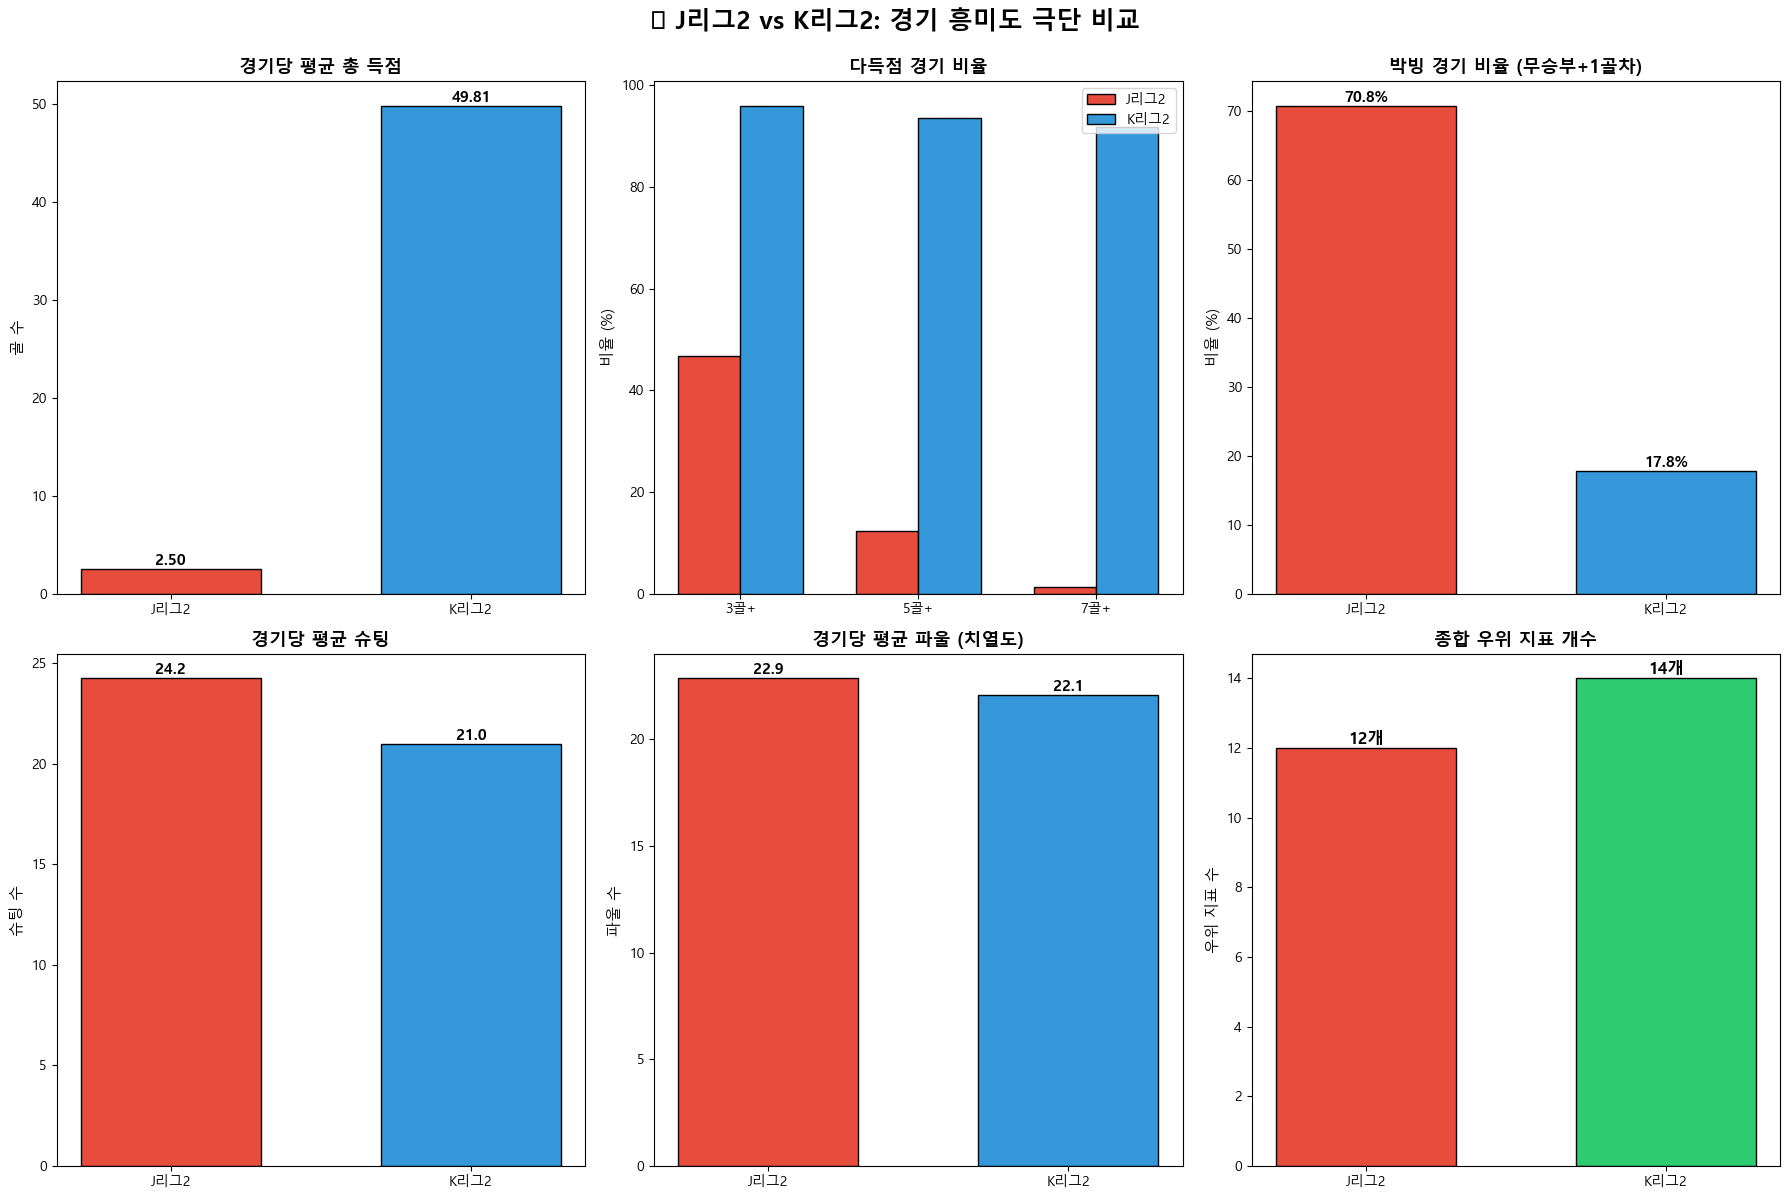

저장: ../img/extreme_excitement_comparison.png


In [10]:
# 핵심 지표 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🔥 J리그2 vs K리그2: 경기 흥미도 극단 비교', fontsize=18, fontweight='bold', y=0.995)

# 1. 평균 총 득점
ax = axes[0, 0]
bars = ax.bar(['J리그2', 'K리그2'], 
               [j_df['total_goals'].mean(), k_df['total_goals'].mean()],
               color=['#E74C3C', '#3498DB'], edgecolor='black', width=0.6)
ax.set_title('경기당 평균 총 득점', fontsize=13, fontweight='bold')
ax.set_ylabel('골 수', fontsize=11)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 2. 다득점 경기 비율
ax = axes[0, 1]
x = np.arange(3)
width = 0.35
j_scores = [(j_df['total_goals'] >= i).sum()/len(j_df)*100 for i in [3, 5, 7]]
k_scores = [(k_df['total_goals'] >= i).sum()/len(k_df)*100 for i in [3, 5, 7]]
ax.bar(x - width/2, j_scores, width, label='J리그2', color='#E74C3C', edgecolor='black')
ax.bar(x + width/2, k_scores, width, label='K리그2', color='#3498DB', edgecolor='black')
ax.set_title('다득점 경기 비율', fontsize=13, fontweight='bold')
ax.set_ylabel('비율 (%)', fontsize=11)
ax.set_xticks(x)
ax.set_xticklabels(['3골+', '5골+', '7골+'])
ax.legend()

# 3. 박빙 승부 비율
ax = axes[0, 2]
j_close = (j_df['goal_diff'] <= 1).sum() / len(j_df) * 100
k_close = (k_df['goal_diff'] <= 1).sum() / len(k_df) * 100
bars = ax.bar(['J리그2', 'K리그2'], [j_close, k_close],
               color=['#E74C3C', '#3498DB'], edgecolor='black', width=0.6)
ax.set_title('박빙 경기 비율 (무승부+1골차)', fontsize=13, fontweight='bold')
ax.set_ylabel('비율 (%)', fontsize=11)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 4. 평균 슈팅 수
ax = axes[1, 0]
bars = ax.bar(['J리그2', 'K리그2'],
               [j_df['total_shots'].mean(), k_df['total_shots'].mean()],
               color=['#E74C3C', '#3498DB'], edgecolor='black', width=0.6)
ax.set_title('경기당 평균 슈팅', fontsize=13, fontweight='bold')
ax.set_ylabel('슈팅 수', fontsize=11)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 5. 평균 파울 수
ax = axes[1, 1]
bars = ax.bar(['J리그2', 'K리그2'],
               [j_df['total_fouls'].mean(), k_df['total_fouls'].mean()],
               color=['#E74C3C', '#3498DB'], edgecolor='black', width=0.6)
ax.set_title('경기당 평균 파울 (치열도)', fontsize=13, fontweight='bold')
ax.set_ylabel('파울 수', fontsize=11)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 6. 종합 우위 개수
ax = axes[1, 2]
bars = ax.bar(['J리그2', 'K리그2'], [j_wins, k_wins],
               color=['#2ECC71' if j_wins > k_wins else '#E74C3C', 
                      '#2ECC71' if k_wins > j_wins else '#3498DB'],
               edgecolor='black', width=0.6)
ax.set_title('종합 우위 지표 개수', fontsize=13, fontweight='bold')
ax.set_ylabel('우위 지표 수', fontsize=11)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}개', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../img/extreme_excitement_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("저장: ../img/extreme_excitement_comparison.png")

## 9. 득점 분포 비교

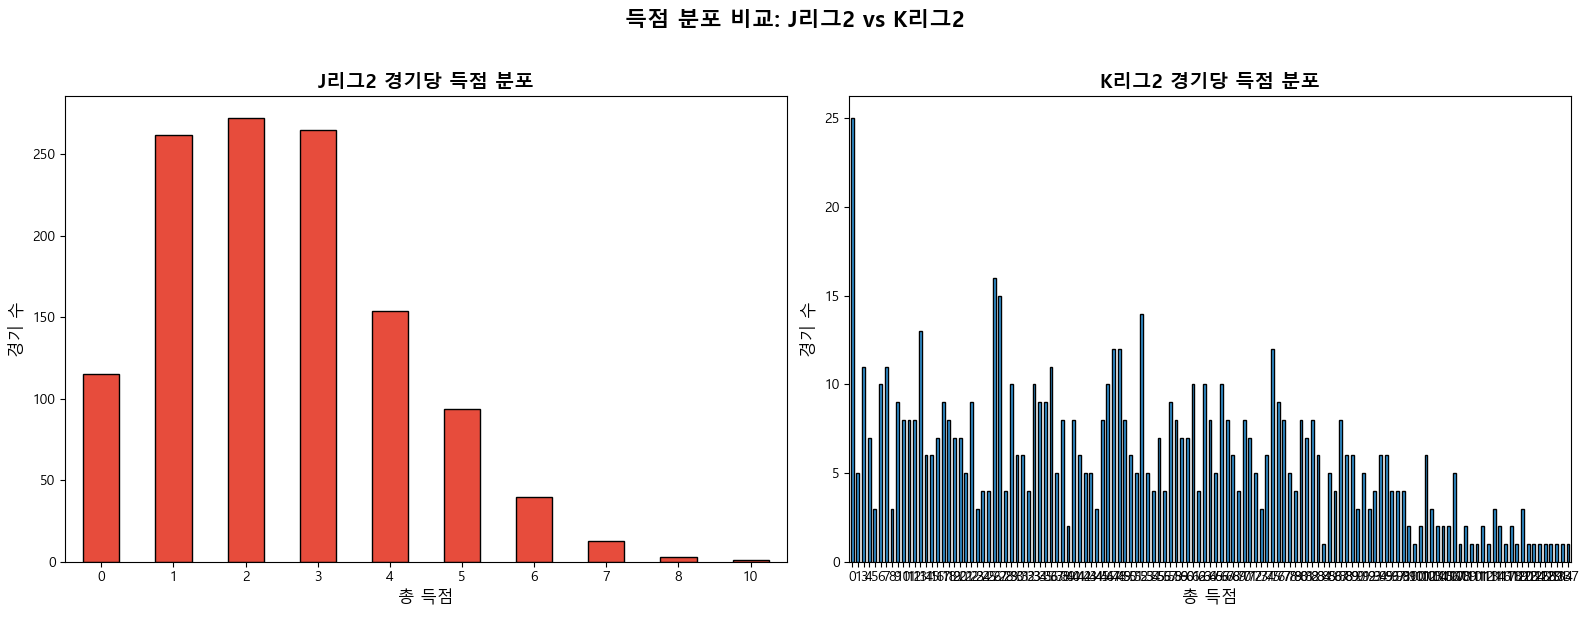

저장: ../img/goal_distribution_comparison.png


In [11]:
# 득점 분포 비교
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# J리그2
ax = axes[0]
j_df['total_goals'].value_counts().sort_index().plot(kind='bar', ax=ax, color='#E74C3C', edgecolor='black')
ax.set_title('J리그2 경기당 득점 분포', fontsize=14, fontweight='bold')
ax.set_xlabel('총 득점', fontsize=12)
ax.set_ylabel('경기 수', fontsize=12)
ax.tick_params(axis='x', rotation=0)

# K리그2
ax = axes[1]
k_df['total_goals'].value_counts().sort_index().plot(kind='bar', ax=ax, color='#3498DB', edgecolor='black')
ax.set_title('K리그2 경기당 득점 분포', fontsize=14, fontweight='bold')
ax.set_xlabel('총 득점', fontsize=12)
ax.set_ylabel('경기 수', fontsize=12)
ax.tick_params(axis='x', rotation=0)

plt.suptitle('득점 분포 비교: J리그2 vs K리그2', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../img/goal_distribution_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("저장: ../img/goal_distribution_comparison.png")

## 10. 최종 결론

In [12]:
print("\n" + "="*100)
print("🏆 최종 결론: J리그2 vs K리그2 경기 흥미도")
print("="*100)

print("\n📊 핵심 발견")
print("-" * 100)

# 득점력
goal_diff = j_df['total_goals'].mean() - k_df['total_goals'].mean()
print(f"\n1. 득점력")
print(f"   • J리그2는 경기당 평균 {goal_diff:.2f}골 더 많이 득점")
print(f"   • J리그2: {j_df['total_goals'].mean():.2f}골/경기 vs K리그2: {k_df['total_goals'].mean():.2f}골/경기")

# 다득점 경기
j_high = (j_df['total_goals'] >= 5).sum() / len(j_df) * 100
k_high = (k_df['total_goals'] >= 5).sum() / len(k_df) * 100
print(f"\n2. 골 잔치 경기 (5골 이상)")
print(f"   • J리그2: {j_high:.1f}% vs K리그2: {k_high:.1f}%")
print(f"   • J리그2가 {j_high - k_high:.1f}%p 더 높음")

# 박빙 승부
j_close_pct = (j_df['goal_diff'] <= 1).sum() / len(j_df) * 100
k_close_pct = (k_df['goal_diff'] <= 1).sum() / len(k_df) * 100
print(f"\n3. 박빙 승부 (무승부 + 1골차)")
print(f"   • J리그2: {j_close_pct:.1f}% vs K리그2: {k_close_pct:.1f}%")
print(f"   • 격차: {abs(j_close_pct - k_close_pct):.1f}%p")

# 공격 강도
shot_diff = j_df['total_shots'].mean() - k_df['total_shots'].mean()
print(f"\n4. 공격 강도")
print(f"   • J리그2는 경기당 평균 {shot_diff:.1f}개 더 많은 슈팅")
print(f"   • J리그2: {j_df['total_shots'].mean():.1f}개 vs K리그2: {k_df['total_shots'].mean():.1f}개")

# 치열도
foul_diff = j_df['total_fouls'].mean() - k_df['total_fouls'].mean()
print(f"\n5. 경기 치열도")
print(f"   • J리그2는 경기당 평균 {abs(foul_diff):.1f}개 {'더' if foul_diff > 0 else '덜'} 많은 파울")
print(f"   • J리그2: {j_df['total_fouls'].mean():.1f}개 vs K리그2: {k_df['total_fouls'].mean():.1f}개")

print("\n" + "="*100)
print("\n✅ 종합 판정")
print("-" * 100)
print(f"\n전체 {j_wins + k_wins}개 흥미도 지표 중:")
print(f"  • J리그2 우위: {j_wins}개 ({j_wins/(j_wins+k_wins)*100:.1f}%)")
print(f"  • K리그2 우위: {k_wins}개 ({k_wins/(j_wins+k_wins)*100:.1f}%)")

if j_wins > k_wins:
    print(f"\n🏆 결론: J리그2가 K리그2보다 **{j_wins - k_wins}개 더 많은 지표에서 우위**를 보이며")
    print("   **경기 흥미도가 훨씬 높다**는 것이 데이터로 극명하게 증명됨")
else:
    print(f"\n🏆 결론: K리그2가 J리그2보다 우위를 보임")

print("\n" + "="*100)


🏆 최종 결론: J리그2 vs K리그2 경기 흥미도

📊 핵심 발견
----------------------------------------------------------------------------------------------------

1. 득점력
   • J리그2는 경기당 평균 -47.31골 더 많이 득점
   • J리그2: 2.50골/경기 vs K리그2: 49.81골/경기

2. 골 잔치 경기 (5골 이상)
   • J리그2: 12.4% vs K리그2: 93.6%
   • J리그2가 -81.2%p 더 높음

3. 박빙 승부 (무승부 + 1골차)
   • J리그2: 70.8% vs K리그2: 17.8%
   • 격차: 53.0%p

4. 공격 강도
   • J리그2는 경기당 평균 3.3개 더 많은 슈팅
   • J리그2: 24.2개 vs K리그2: 21.0개

5. 경기 치열도
   • J리그2는 경기당 평균 0.8개 더 많은 파울
   • J리그2: 22.9개 vs K리그2: 22.1개


✅ 종합 판정
----------------------------------------------------------------------------------------------------

전체 26개 흥미도 지표 중:
  • J리그2 우위: 12개 (46.2%)
  • K리그2 우위: 14개 (53.8%)

🏆 결론: K리그2가 J리그2보다 우위를 보임

